In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data=pd.read_csv("Salary_Data.csv")
print(data.head())
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#print(x)
#print(y)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [62]:
# Splitting the data sets into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [63]:
#Training the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
# Predicting the Test set results
y_pred=lr.predict(x_test)
print(y_pred)

[75074.50510972 91873.8056381  62008.38247653 81607.56642631
 67608.14931932 89073.92221671]


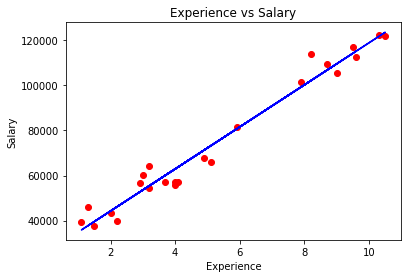

In [65]:
# Visualizing the Training set data
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,lr.predict(x_train),color="blue")
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

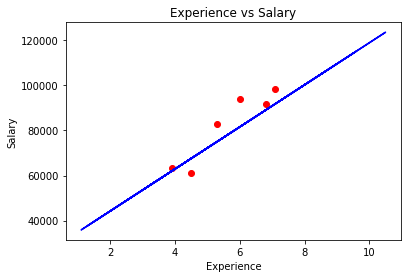

In [66]:
# Visualizing the Testing set data
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,lr.predict(x_train),color="blue")
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [67]:
print(lr.predict([[12]])) # Given years of experience =12 years and we need to predict the Salary.
# predict() method always expects a 2D array as input.

[137605.23485427]


In [68]:
print(lr.coef_) # slope value (m) or coefficient value (b1)
print(lr.intercept_) # y-intercept value, c-value or b0 value.

[9332.94473799]
25609.89799835482


# Manual calculation of Coefficient and Intercept values

In [77]:
data=pd.read_csv("Salary_Data.csv")
print(data.columns)
a=data["YearsExperience"]
#print(a,type(a))
b=data["Salary"]
#print(b,type(b))
l1=a.tolist()
print(l1)
l2=b.tolist()
print(l2)

Index(['YearsExperience', 'Salary'], dtype='object')
[1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5]
[39343.0, 46205.0, 37731.0, 43525.0, 39891.0, 56642.0, 60150.0, 54445.0, 64445.0, 57189.0, 63218.0, 55794.0, 56957.0, 57081.0, 61111.0, 67938.0, 66029.0, 83088.0, 81363.0, 93940.0, 91738.0, 98273.0, 101302.0, 113812.0, 109431.0, 105582.0, 116969.0, 112635.0, 122391.0, 121872.0]


In [80]:
c=sum(l1) # Summation x
print(c)
d=sum(l2) # Summation y
print(d)

159.4
2280090.0


In [92]:
pro=[]
for i,j in zip(l1,l2):
    pro.append(i*j)
print(pro)
e=sum(pro) # Summation xy
print(e)

[43277.3, 60066.5, 56596.5, 87050.0, 87760.20000000001, 164261.8, 180450.0, 174224.0, 206224.0, 211599.30000000002, 246550.19999999998, 223176.0, 227828.0, 234032.09999999998, 274999.5, 332896.2, 336747.89999999997, 440366.39999999997, 480041.7, 563640.0, 623818.4, 697738.2999999999, 800285.8, 933258.3999999999, 952049.7, 950238.0, 1111205.5, 1081296.0, 1260627.3, 1279656.0]
14321961.0


In [84]:
l3=[]
for i in l1:
    l3.append(i*i)
print(l3)

[1.2100000000000002, 1.6900000000000002, 2.25, 4.0, 4.840000000000001, 8.41, 9.0, 10.240000000000002, 10.240000000000002, 13.690000000000001, 15.209999999999999, 16.0, 16.0, 16.81, 20.25, 24.010000000000005, 26.009999999999998, 28.09, 34.81, 36.0, 46.239999999999995, 50.41, 62.410000000000004, 67.24, 75.68999999999998, 81.0, 90.25, 92.16, 106.09000000000002, 110.25]


In [85]:
f=sum(l3) # Summation of x^2
print(f)

1080.5


In [86]:
g=c*c # summation x whole square
print(g)

25408.36


# Coefficient value calculation

In [90]:
n=30
m=((n*e)-(c*d))/((n*f)-g) # m= (n*summation(xy)-(summation(x).summation(y)))/ ((n*summation(x^2)-(summation(x))^2)
m

9449.962321455077

# Intercept value calculation

In [93]:
k=(d-(m*c))/n  # c=(summation(y)-m*summation(x))/n
k

25792.200198668685

# Equation of the Line: y=m*x + c  implies y=9449.96232 * x +25792.2001 

In [97]:
for i in x_test:
    y_p=(m*i)+k
    print(y_p)

[75877.00050238]
[92886.932681]
[62647.05325234]
[82491.9741274]
[68317.03064522]
[90051.94398456]
